In [ ]:
!pip install -U sentence-transformers scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 2.2.3


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Re-load the dataset safely
df = pd.read_csv("/content/WELFake_Dataset.csv", on_bad_lines='skip', engine='python')

# Keep only rows where label is 0 or 1
df = df[df['label'].isin([0, 1])]

# Drop missing text entries
df = df.dropna(subset=['text'])

# Check label distribution again
print(df['label'].value_counts())


Series([], Name: count, dtype: int64)


In [ ]:
# Check column names
print("🧾 Column names:", df.columns.tolist())

# Show first few rows
print("\n🔍 First few rows:")
print(df.head(3))


🧾 Column names: ['Unnamed: 0', 'title', 'text', 'label']

🔍 First few rows:
Empty DataFrame
Columns: [Unnamed: 0, title, text, label]
Index: []


In [ ]:
# Convert label column to numeric, forcing invalid entries to NaN
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Drop rows where label couldn't be converted
df = df.dropna(subset=['label'])

# Convert to integer type now that we know it's clean
df['label'] = df['label'].astype(int)

# Drop any rows with missing text
df = df.dropna(subset=['text'])

# Check result
print(df['label'].value_counts())


label
1    37065
0    35028
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

texts = df['text'].tolist()
labels = df['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

# Generate embeddings
X_train_embeddings = model.encode(X_train, show_progress_bar=True, batch_size=32)
X_test_embeddings = model.encode(X_test, show_progress_bar=True, batch_size=32)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1803 [00:00<?, ?it/s]

Batches:   0%|          | 0/451 [00:00<?, ?it/s]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on test set
y_pred = clf.predict(X_test_embeddings)

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy:", round(acc * 100, 2), "%")
print("✅ F1 Score:", round(f1 * 100, 2), "%")


✅ Accuracy: 91.73 %
✅ F1 Score: 91.87 %


In [ ]:
import joblib



# 1. Save your trained logistic classifier
joblib.dump(clf, "mpnet_classifier.pkl")


In [ ]:
import joblib
joblib.dump(model, "vectorizer.pkl")

['vectorizer.pkl']

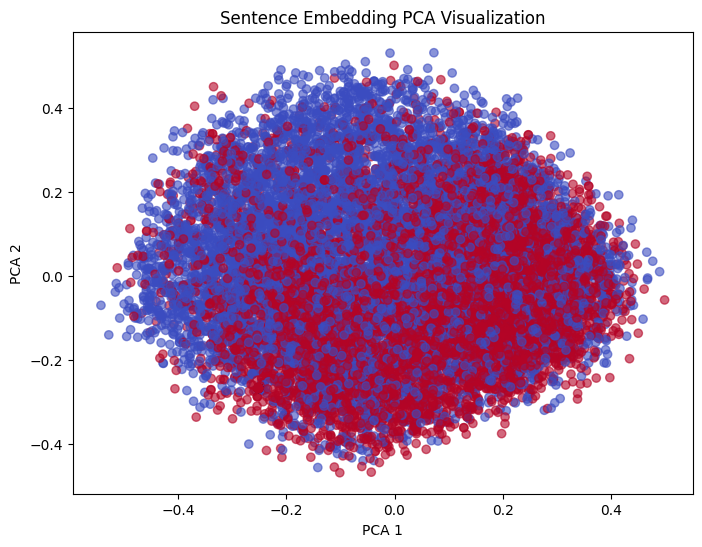

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_test_embeddings)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=y_test, cmap='coolwarm', alpha=0.6)
plt.title("Sentence Embedding PCA Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
# Your test input (real or fake)
new_text = ["Breaking: The president has resigned due to leaked documents."]

# Step 1: Convert to embedding
new_embedding = model.encode(new_text)

# Step 2: Predict using the trained classifier
prediction = clf.predict(new_embedding)

# Step 3: Interpret the result
print("Prediction:", "Fake News" if prediction[0] == 1 else "Real News")


Prediction: Fake News


In [ ]:
test_articles = [
    "Government approves a new climate change bill to reduce emissions.",      # likely real
    "Aliens have landed and are negotiating with world leaders."              # clearly fake
]

embeddings = model.encode(test_articles)
predictions = clf.predict(embeddings)

for i, article in enumerate(test_articles):
    label = "Fake News" if predictions[i] == 1 else "Real News"
    print(f"📰 Article: {article}\n→ Prediction: {label}\n")


📰 Article: Government approves a new climate change bill to reduce emissions.
→ Prediction: Real News

📰 Article: Aliens have landed and are negotiating with world leaders.
→ Prediction: Real News

